In [6]:
from helper_functions import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import pathlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, experimental, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import argparse
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions import *

In [16]:
training_data, y_train, testing_data, y_test = get_training_testing_data()

batch = 32
n = 60000

train = training_data.reshape((training_data.shape[0], 28, 28, 1))
test = testing_data.reshape((testing_data.shape[0], 28, 28, 1))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

model = Sequential([
    layers.Conv2D(24, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(24, 3, activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(strides=(2,2)),
    layers.Conv2D(48, 3, activation='relu'),
    layers.Conv2D(48, 3, activation='relu'),
    layers.Conv2D(48, 3, activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(strides=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

epochs = 30
model.summary()

history = model.fit(x=train[:n], y=y_train[:n], validation_split=0.3, epochs=epochs, callbacks=[callback], batch_size=batch)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 24)        240       
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 24)        5208      
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 24)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 10, 10, 48)        10416     
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 48)          20784     
                                                      

In [180]:
# from keras.utils import to_categorical

# # make the model and load the training dataset.

# y_train = to_categorical(y_train)

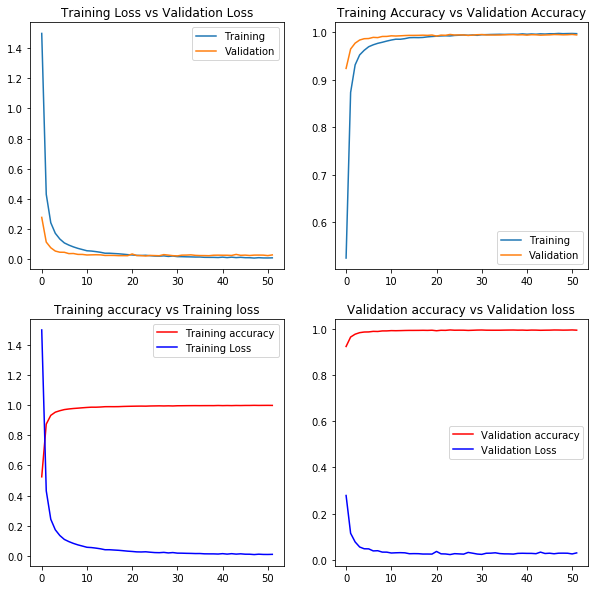

In [190]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

axs[0,0].plot(loss)
axs[0,0].plot(val_loss)
axs[0,0].title.set_text('Training Loss vs Validation Loss')
axs[0,0].legend(['Training', 'Validation'])

axs[0,1].plot(acc)
axs[0,1].plot(val_acc)
axs[0,1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[0,1].legend(['Training', 'Validation'])

axs[1,0].plot(epochs, acc, 'r', label='Training accuracy')
axs[1,0].plot(epochs, loss, 'b', label='Training Loss')
axs[1,0].title.set_text('Training accuracy vs Training loss')
axs[1,0].legend(loc=0)

axs[1,1].plot(epochs, val_acc, 'r', label='Validation accuracy')
axs[1,1].plot(epochs, val_loss, 'b', label='Validation Loss')
axs[1,1].title.set_text('Validation accuracy vs Validation loss')
axs[1,1].legend(loc=0)


In [14]:
score = model.evaluate(test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0429 - accuracy: 0.9906


In [196]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

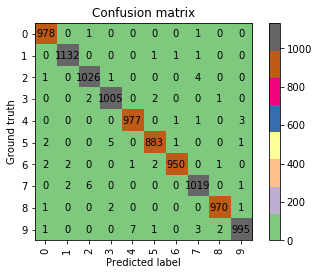

In [197]:
category = [i for i in range(10)]
conf_mat = confusion_matrix(y_test, pred)
indexes = np.arange(len(category))
for i in indexes:
    for j in indexes:
        plt.text(j, i, conf_mat[i, j], 
                horizontalalignment='center', 
                verticalalignment='center')
plt.imshow(conf_mat, cmap=plt.cm.Accent)
plt.colorbar()
plt.xticks(indexes, category, rotation=90)   
plt.xlabel('Predicted label')
plt.yticks(indexes, category)
plt.ylabel('Ground truth')
plt.title('Confusion matrix')
plt.show()

In [198]:
from sklearn.metrics import classification_report
ground = y_test
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

